# 3 . 신경망의 학습

### 실행 전 환경 구성을 위한 코드 (먼저 실행)



#### MNIST 데이터 적재
* common 모듈 사용을 위한 경로 지정시 pickle 오류 발생 문제 회피
* 사전에 load_mnist 라이브러리 import 및 MNIST 파일 데이터 load

In [ ]:
# 4.0.1 mnist.py 파일 로드
from google.colab import files
src = list(files.upload().values())[0]

Saving mnist.py to mnist.py


In [ ]:
# 4.0.2 mnist 데이터 적재
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#### common 라이브러리 
* 이전에 작성한 여러 함수 및 원활한 프로그램 수행을 위한 utility 등 저자 제공 파일들
* common 라이브러리 내 모듈 사용을 위해 google drive mount 및 경로 지정
* 사전에 G 드라이브 내 Colab Notebooks 디렉토리에 common 폴더 복제

In [ ]:
# 4.0.3  common 폴더 로드 (구글 드라이브 마운트)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 4.0.4 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


### 3.1 데이터의 학습
### 3.1.1 데이터 구동
### 3.1.2 훈련 데이터와 테스트데이터


## 3.2 손실함수 (loss function)


### 3.2.1 오차제곱합 SSE Sum of Squared Error

#### sum_squared_error()

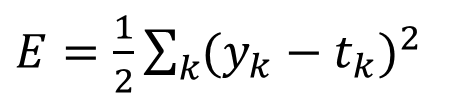

In [ ]:
# 3.2.1 오차 제곱합 함수
import numpy as np

def sum_squared_error(y, t) :
    return 0.5 *np.sum((y-t)**2)

In [ ]:
# 3.2.2 출력층과 정답레이블 예시 데이터 (정답에 가까운 경우)
y = np.array ([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) #정답
y1 =np.array ([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]) #오답
t = np.array ([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# 3.2.3  정답 오차제곱합 (손실함수) 계산
sum_squared_error ( y, t)

0.09750000000000003

In [ ]:
# 3.2.4 정답과 먼 경우의 출력층과 그 오차제곱합 (손실함수)

sum_squared_error ( y1, t)

0.5975

### 3.2.2 교차엔트로피오차

#### firgure of log

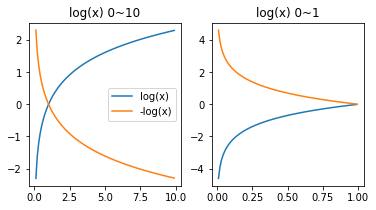

In [ ]:
# 4.2.2.1 교차 엔트로피 오차 이해를 위한 로그 함수 시각화

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (6,3))

x1 = np.arange(0.1, 10, 0.1)   # 0~10
x2 = np.arange(0.01, 1, 0.01)  # 0~1
y1 = np.log (x1)   # log at 0~10
y2 = np.log (x2)   # log at 0~1

# 0~10 사이 log 와 -log
ax[0].plot(x1, y1)
ax[0].plot(x1,-y1)
ax[0].set_title('log(x) 0~10')
ax[0].legend(['log(x)','-log(x)'])

# 0~1 사이 log 와 -log
ax[1].plot(x2, y2)
ax[1].plot(x2, -y2)
ax[1].set_title('log(x) 0~1')
plt.show()


#### cross_entropy_error()
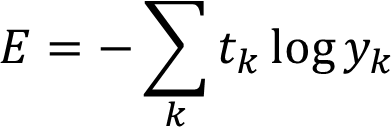

In [ ]:
# 4.2.2.2 교차 엔트로피 오차 함수 정의 
def cross_entropy_error (y, t) :
    delta = 1e-7
    return - np.sum(t * np.log(y +delta))

In [ ]:
# 4.2.2.3  SSE 확인을 위해 생성한 데이터와 동일한 임의의 값
y = np.array ([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) #정답
y1 =np.array ([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]) #오답
t = np.array ([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# 4.2.2.4 정답 출력의 CEE
cross_entropy_error (y,t)

0.510825457099338

In [ ]:
# 4.2.2.5 오답 출력의 CEE
cross_entropy_error (y1,t)

2.302584092994546

### 3.2.3 미니배치 학습

#### upload mnist.py file and loas MNIST

In [ ]:
# 4.2.3.1 미니 배치 구현 원리 확인을 위한 난수 생성 (60,000 개 중 10개 숫자 뽑기)
import numpy as np
np.random.choice(60000,10)

array([48397,  9930, 31666, 48426,  6697, 30129, 39880, 40364, 52883,
       33976])

# 3.2.3.2 MNIST 데이터 적재 ( 정규화 , 원-핫 인코딩)
(x_train, t_train), (x_test, t_test) = 
load_mnist(normalize = True, one_hot_label=True)

print (x_train.shape)
print (t_train.shape)

#### minibatch logic

In [ ]:
# 4.2.3.3 배열의 원소 참조 방식 예시 배열
arr = np.array ([0,10,20, 30, 40, 50])
print (arr)

# 인덱싱 : 인덱스 번호 지정
print (arr[0])    # 0

# 슬라이싱 : 인덱스 범위 지정
print (arr[0:2])  # [0, 10]

# 팬시 인덱싱 : 정수인덱스 리스트를 전달하면, 해당 인덱스만 추출
print (arr[[1,4] ]) # [10,40]

# 불리언 인덱싱 : 배열의 축과 같은 크기의 불리언 배열에 대해서 True만 추출
print (arr[[True, False, False, True, False,False] ])  # [0, 30]

[ 0 10 20 30 40 50]
0
[ 0 10]
[10 40]
[ 0 30]


In [ ]:
# 4.2.3.4 훈련데이터에서 배치 크기 만큼의 숫자 임의 추출 후 뽑아내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size , batch_size)
print ('batch_mask :', batch_mask) 

x_batch = x_train[ batch_mask ]
t_batch = t_train[ batch_mask ]
print (t_batch)

batch_mask : [13647 32904 35410  4646 59004 44543 24963 47493 29035  3210]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


# 3.2.4 [뱃치 대응버전] 교차엔트로피오차 구현

#### cross_entropy_error() : batch version

In [ ]:
# 4.2.4.1 교차 엔트로피 오차 함수 배치 대응 버전 (원핫인코딩)
def cross_entropy_error(y,t) :
    if y.ndim==1:
        t= t.reshape(1, t.size)
        y= y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t* np.log(y + 1e-7)) / batch_size

In [ ]:
# 4.2.4.2 교차 엔트로피 오차 함수 배치 대응 버전 (레이블형)
def cross_entropy_error(y,t) :
    if y.ndim==1:
        t= t.reshape(1, t.size)
        y= y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
# 4.2.4.3   #4.2.4.2 마지막줄 인덱싱 관련 부연설명
y = np.array([[10,11,12,13,] ,     #0
              [20,21,22,23,] ] )   #1
t = np.array ([2, 1] )

print ('y[np.arange(2), t]) --> y[[0,1],[2,1]]')
print (y[np.arange(2), t])

y[np.arange(2), t]) --> y[[0,1],[2,1]]
[12 21]


### 3.2.5 손실함수를 사용하는 이유


## 3.3 수치미분


### 3.3.1 미분

#### numerical_diff()

In [ ]:
# 4.3.1.1 수치 미분 함수 나쁜 예
# 1. computer cannot compute small number 
# 2. when h isn't small enough, actual numbers aren't correct

def numerical_diff(f,x) :
    h = 1e-50
    return (f(x+h) - f(x)) / h

In [ ]:
# 4.3.1.2 숫자 표기 확인
1e-1,  1e-4, 1e4

(0.1, 0.0001, 10000.0)

In [ ]:
# 4.3.1.3 수치 미분 함수 

def numerical_diff(f,x) :
    h = 1e-4    # 적절한 크기의 수치
    return  (f(x+h -f(x-h)) ) /(2*h)  # 지점 앞 뒤의 값

### 3.3.2 수치미분의 예 

$$y=0.01x^2+0.1x$$
$$y' = 0.02x + 0.1$$

#### function_1()

In [ ]:
# 4.3.2.1 함수 정의
def function_1 (x):
    return 0.01*x**2 +0.1*x

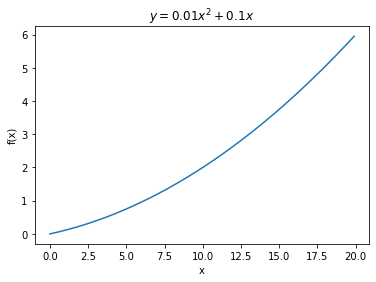

In [ ]:
# 4.3.2.2 함수 시각화
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.title ('$y=0.01x^2+0.1x$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
# 4.3.2.3 함수의 미분 (x= 5)
numerical_diff(function_1, 5)

3028.236000627499

In [ ]:
# 4.3.2.4 함수의 미분 (x= 10)
numerical_diff(function_1, 10)

7200.169000714999

#### drawing tangent

diff d: 3028.236000627499
y=f(x0)=f(5)=0.75
tangent line = d*(x-x0) + y = 3028.236000627499*(x-5) + 0.75)


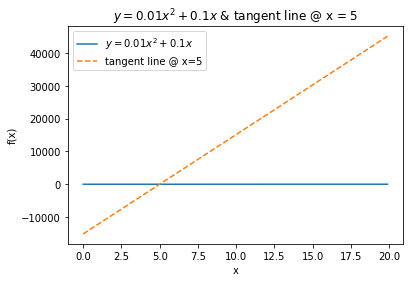

In [ ]:
# 4.3.2.5 접선 @ (x= 5)

# 수치미분 결과로 접선을 만드는 함수
def tangent_line(f, x0):
    d = numerical_diff(f, x0)
    print('diff d:', d)

    y0 = f(x0)    
    print(f'y=f(x0)=f({x0})={y0}')


    def tangent_func (x) :
      return d*(x-x0) + y0
    print(f'tangent line = d*(x-x0) + y = {d}*(x-{x0}) + {y0})')
    
    return tangent_func
     
# 함수
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

# 접선
tangent_5 = tangent_line(function_1, 5) # 접선함수 @ x=5
y2 = tangent_5(x)   # 접선 함수를 이용한 y 값
plt.plot(x, y2, linestyle = '--')

plt.title ('$y=0.01x^2+0.1x$ & tangent line @ x = 5')
plt.legend (['$y=0.01x^2+0.1x$', 'tangent line @ x=5'])
plt.show()

### 3.3.3 편미분
$$f(x_0, x_1) = x^2_0+x^2_1 $$  

#### function_2()

In [ ]:
# 4.3.3.1 다변량 함수 정의 
#  매개변수 x 는  [x0,x1] 형태
def function_2(x):
    return x[0]**2 + x[1]**2   # np.sum(x**2)

In [ ]:
# 4.3.3.2 여러 위치에서의 함수 값 구하기
#  (1,1) (0,0) (1,0) (3,4)
x = np.array([ [ 1,0,1,3],[1,0,0,4]])
function_2(x)

array([ 2,  0,  1, 25])

#### drawing function_2

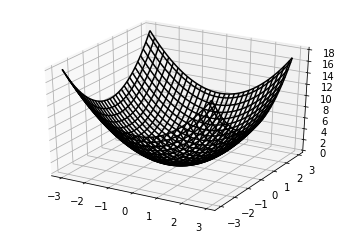

In [ ]:
# 4.3.3.3 다변량 함수 그래프 출력 
x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)
X,Y = np.meshgrid(x,y)

Z = function_2(np.array([X,Y]))
Z

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X,Y,Z, color = 'black') 
plt.show()

In [ ]:
# 4.3.3.4 Q1 x0=3, x1 = 4 일때 x0에 대한 편미분 구하기

def function_tmp1 (x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3)

2499846.0046499297

In [ ]:
# 4.3.3.5 Q2 x0=3, x1 = 4 일때 x1에 대한 편미분 구하기

def function_tmp2 (x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4)

2249811.00614991

## 3.4 기울기 (gradient)

#### numerical_gradient()

In [ ]:
# 4.4.0.1 x에 지정된 변수별로 수치미분하여 기울기 도출

def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x) # X와 같은모양 배열
    
    for idx in range(x.size):  # 변수 마다 값을 약간씩 변경하여 미분 구하기
        # f(x+h)
        tmp_val = x[idx]
        x[idx] = tmp_val +h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)   # 해당 변수의 미분
        x[idx] = tmp_val
        
    return grad
        
        

In [ ]:
# 4.4.0.2 (x0,x1) = (3,4) 에서의 기울기
numerical_gradient ( function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
# 4.4.0.3 (x0,x1) = (0,2) 에서의 기울기
numerical_gradient ( function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [ ]:
# 4.4.0.3 (x0,x1) = (3,0) 에서의 기울기
numerical_gradient ( function_2, np.array([3.0,0.0]))  # 3.0,0.0 처럼 실수로 넘겨야함. 정수말고

array([6., 0.])

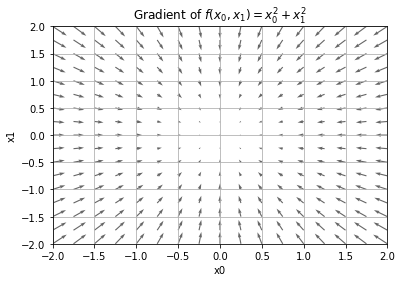

In [ ]:
# 4.4.0.4  화살표로 표현한 기울기 그래프 
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 원 값으로 변경
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.title ('Gradient of $f(x_0, x_1) = x^2_0+x^2_1 $')
    plt.grid()
    plt.draw()
    plt.show()


### 3.4.1 경사법 (경사하강법)

#### gradient_descent()

In [ ]:
# 4.4.1.1 경사 하강법으로 최소 지점 찾기위한 함수 정의
def gradient_descent(f, init_x, lr = 0.01, step_num = 100) :
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)  #함수와 최초지점 넣어주기
        x -=  lr * grad                  #학습률 곱하기 기울기
    
    return x

In [ ]:
# 4.4.1.2 Q : f(x0,x1) = x0^2 + x1^2 의 최소값을 경사하강법으로 구하라
#  (초기값  init_x = [-3,4] , 학습률 lr = 0.01)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x, 0.01)

array([-0.39785867,  0.53047822])

In [ ]:
# 4.4.1.3 too large step (너무 큰 학습률)
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, 10)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 4.4.1.4 too small step (너무 작은 학습률)
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, 1e-10)

array([-2.99999994,  3.99999992])

#### drawing path of gradient descent

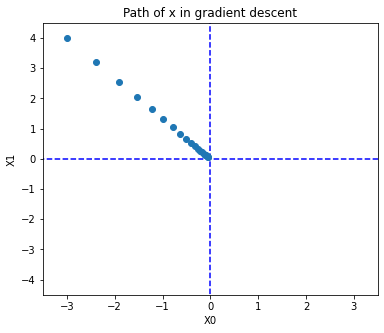

In [ ]:
# 4.4.1.5 학습률 변화에 따른 탐색과정
import numpy as np
import matplotlib.pylab as plt

# 입력 데이터 하나 당 기울기
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size): # 각 변수별 h 변화로 미분 구함
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 해당 변수 값을 원복한다. 
        
    return grad

# 배치 대응 기울기
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for i, x in enumerate(X):
            grad[i] = _numerical_gradient_no_batch(f, x)
        
        return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.figure(figsize =(6,5))
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.title ('Path of x in gradient descent')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


### 3.4.2 신경망에서의 기울기

#### class simpleNet

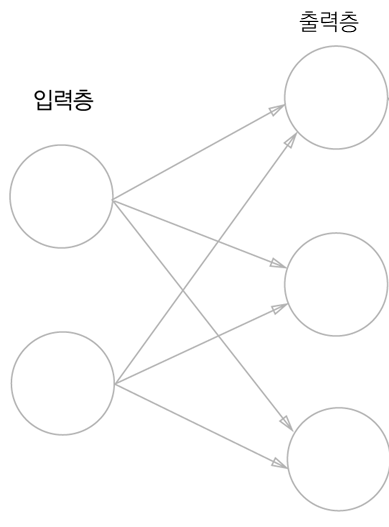

In [ ]:
# 4.4.2.1 경사하강법을 적용한 기울기를 구할 수 있는 단순한 신경망 정의

import numpy as np

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet :
    def __init__ (self) :      # 가중치
        self.W = np.random.randn(2,3)
        
    def predict (self, x) :    # 신경망 신호전달 forward
        return np.dot (x, self.W)
    
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error (y, t)  # cross_entropy_error : 손실함수
        return loss

#### 예측값 > 손실함수 > 기울기

In [ ]:
# 4.4.2.2 SimpleNet의 가중치 
net = simpleNet()
print (net.W)

[[-1.08449493  1.494591    1.22955489]
 [-1.23815015 -0.80199228 -1.02271023]]


In [ ]:
# 4.4.2.3 SimpleNet의 예측값 
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.76503209  0.17496155 -0.18270628]


In [ ]:
# 4.4.2.4 SimpleNet의 예측 결과 
np.argmax(p)

1

In [ ]:
# 4.4.2.5 가상의 정답 t 로 손실함수 구하기
t = np.array([0,0,1])
net.loss(x, t)

0.9690677699577523

In [ ]:
# 4.4.2.6 손실함수를 미분 대상 함수로 정의  
def f(W) :   #W는 더미..
    return net.loss(x, t)

In [ ]:
# 4.4.2.7 손실함수에 대해 가중치의 기울기 구하기 
dW = numerical_gradient (f, x)
print(dW)

[-0.03662708  0.10296098]


## 3.5 학습알고리즘의 구현


### 3.5.1 2층 신경망 클래스

#### class TwoLayerNet

In [ ]:
# 4.5.1.1 TwoLayerNet의 클래스 정의
# 변수  params  : 가중치와 편향
#       grads  : 가중치와 편향의 기울기 
# 메소드 __init__() : 가중치 초기화
#       predict() : 신경망의 신호전달 
#       loss()  : 손실함수 
#       accuracy() : 정확도 계산
#       numerical_gradient() : 신경망에 대한 가중치, 편향의 기울기
#       gradient() : 다음 단원 오차역전파로 구현 (속도 문제로.)

import sys, os
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet :
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std = 0.01) :
        # 가중치의 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn (input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn (hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict (self,x) : 
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot (x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력데이터, t : 정답레이블
    
    def loss (self, x, t) :
        y = self.predict(x)
        return cross_entropy_error (y,t)
    
    def accuracy (self, x, t) :
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum (y==t ) / float(x.shape[0])
        return accuracy
    
    # x : 입력데이터, t : 정답레이블
    def numerical_gradient (self, x, t) :
        loss_W = lambda W : self.loss(x,t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    # 속도 개선을 위해 다음장에 배울 내용 일단 기술    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [ ]:
# 4.5.1.2 TwoLayerNet의 가중치 편향
net = TwoLayerNet (input_size = 784, hidden_size = 100, output_size = 10)
net.params['W1'].shape  # (784,100)
net.params['b1'].shape  # (100,)
net.params['W1'].shape  # (100,10)
net.params['W1'].shape  # (10,)

(784, 100)

In [ ]:
# 4.5.1.3 임의의 20 쌍의 입력데이터 정답레이블
x = np.random.rand(20,784) # 더미 입력데이터
t = np.random.rand(20,10)  # 더미 레이블


In [ ]:
# 4.5.1.4 임의의 입력데이터 20개에 대한 예측 수행
y_pred = net.predict(x)
y_pred[-2:]

array([[0.09885368, 0.10083559, 0.10509553, 0.09673786, 0.09831961,
        0.1045209 , 0.09755236, 0.10158751, 0.09980014, 0.09669683],
       [0.09868225, 0.10083574, 0.10543373, 0.09702537, 0.09835394,
        0.10406485, 0.09760545, 0.10125284, 0.09980828, 0.09693756]])

In [ ]:
# 4.5.1.5 임의의 입력데이터/정답 20개에 대한 손실함수 구하기
y_loss = net.loss(x,t)
y_loss

2.302912360159441

In [ ]:
# 4.5.1.6  임의의 20 쌍의 입력데이터 정답레이블에 대한 기울기 구하기

grads = net.numerical_gradient (x, t)  
# 20건에 대해서 한 번 미분 수행한는데 1분 이상 소요

print (grads['W1'].shape)  # (784,100)
print (grads['b1'].shape)  # (100,)
print (grads['W1'].shape)  # (100,10)
print (grads['W1'].shape)  # (10,)

(784, 100)
(100,)
(784, 100)
(784, 100)


## 3.5.2 미니배치의 구현

In [ ]:
# 4.5.2.1  TwoLayerNet에 대한 경사 하강법 학습 수행

import numpy as np
from mnist import load_mnist

# 데이터 적재
(x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, one_hot_label=True)

# 훈련 손실 기록
train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50, \
                      output_size=10)


# 훈련 수행
for i in range(iters_num):
    # 1단계 미니배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 2단계 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능개선판
    
    # 3단계 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 그래프 작성을 위한 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

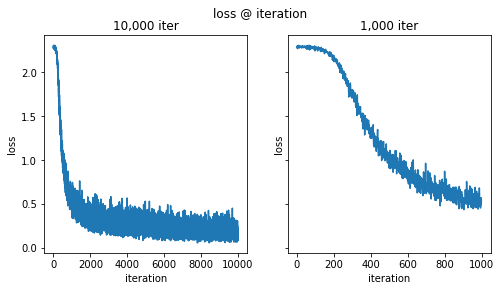

In [ ]:
# 4.5.2.2 학습 과정 중 손실함수 변화 그래프

import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2, sharey=True,
                      figsize = (8,4))

x = np.arange(len(train_loss_list))
ax[0].plot(x, train_loss_list)
ax[0].set_title('10,000 iter')
ax[1].plot(x[:1000], train_loss_list[:1000]) 
ax[1].set_title('1,000 iter')
fig.suptitle ('loss @ iteration')

for axe in ax.flat:
  axe.set_xlabel('iteration')
  axe.set_ylabel('loss')
  
plt.show()

### 3.5.3 테스트데이터로 평가

train_acc=0.0903,  test_acc=0.0892
train_acc=0.7885,  test_acc=0.7947
train_acc=0.8769,  test_acc=0.8824
train_acc=0.8998,  test_acc=0.9030
train_acc=0.9095,  test_acc=0.9121
train_acc=0.9143,  test_acc=0.9175
train_acc=0.9204,  test_acc=0.9229
train_acc=0.9240,  test_acc=0.9256
train_acc=0.9271,  test_acc=0.9290
train_acc=0.9314,  test_acc=0.9320
train_acc=0.9334,  test_acc=0.9345
train_acc=0.9361,  test_acc=0.9359
train_acc=0.9384,  test_acc=0.9377
train_acc=0.9408,  test_acc=0.9398
train_acc=0.9431,  test_acc=0.9406
train_acc=0.9453,  test_acc=0.9424
train_acc=0.9467,  test_acc=0.9437


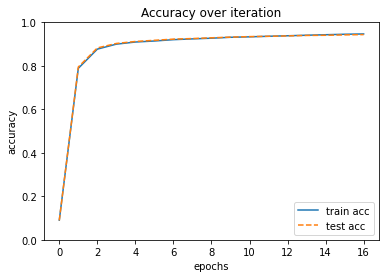

In [ ]:
# 4.5.3.1  1 epoch 마다 시험데이터로 정확도, 손실 평가

from mnist import load_mnist

# 데이터 적재
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

# 훈련 손실
# 훈련 및 시험 정확도 기록
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 하이퍼 파라미터
iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50,\
                      output_size=10)

# 정확도 계산을 위한 지점 설정 (전체 데이터 순회 epoch)
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 1단계 미니배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 2단계 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능개선판
    
    # 3단계 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 그래프 작성을 위한 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 epoch 마다 정확도 계산 및 진행경과 출력
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train_acc={train_acc:.4f},',\
              f' test_acc={test_acc:.4f}')

# 그래프 
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc',\
         linestyle='--')
plt.title ('Accuracy over iteration')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()